# 🏠 Multi-feature House Price Prediction (Multiple Linear Regression)

## 1️⃣ Problem Setup
We want to predict **house price** based on multiple factors:  
- **Size (sqft)**  
- **Bedrooms**  
- **Age of house**  

- Input (`X`) → multiple features (size, bedrooms, age)  
- Output (`y`) → price  

Intuition: bigger, newer houses with more bedrooms → higher price.

---

## 2️⃣ Data Example

| Size (sqft) | Bedrooms | Age (years) | Price (₹) |
|-------------|----------|-------------|------------|
| 2100        | 3        | 10          | 400000     |
| 1600        | 2        | 5           | 330000     |
| 2400        | 4        | 8           | 369000     |
| 1416        | 2        | 20          | 232000     |
| 3000        | 4        | 5           | 540000     |

- `X = [[2100, 3, 10], [1600, 2, 5], ...]` → features (2D)  
- `y = [400000, 330000, 369000, 232000, 540000]` → target (1D)  

---

## 3️⃣ Equation (Multiple Linear Regression)
\[
y = m1 ⋅ x1 + m2 ⋅ x2 + m3 ⋅ x3 + b
\]

- `x1` = Size, `m1` = effect of size on price  
- `x2` = Total number of Bedrooms, `m2` = effect of bedrooms on price  
- `x3` = Age of the house, `m3` = effect of age on price  
- `b` = intercept → base price (when all features = 0)  

---

## 4️⃣ Intuition of Model Training
- The model **looks at all features together**  
- It finds the combination of `m1, m2, m3, b` that **best fits all data points**  
- Output: a **line/plane in multidimensional space** (conceptually similar to single-feature regression)  

---

## 5️⃣ Train/Test Split
- Split dataset into **training** (e.g., 80%) and **testing** (20%)  
- Train on training data → test predictions on unseen data  
- Ensures model **generalizes** and doesn’t just memorize  

---

## 6️⃣ Prediction
- New house: `[2000 sqft, 3 bedrooms, 5 years old]`  
- Predicted price:  
\[
{Price} = m1 ⋅ 2000 + m2 ⋅ 3 + m3 ⋅ 5 + b
\]

- Same concept as single-feature regression, all features contribute.  

---

## 7️⃣ Key Notes
- `X` → always 2D (rows = houses, columns = features)  
- `y` → always 1D (target per house)  
- Evaluation metrics: MSE, R²  
- Multi-feature regression = multiple slopes + intercept, conceptually same as single-feature regression  

---

💡 **Takeaway:**  
Single-feature regression = slope + intercept in 2D  
Multi-feature regression = multiple slopes + intercept in multidimensional space  
- Math is the same; just more inputs now.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
'''
- here actually fetch_california_housign returns a list of different objects like;
data, feature_names, target etc...
- so i wanna create a dataframe using them
- for more info: visit👉 (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)
'''

df = pd.DataFrame(data.data, columns=data.feature_names)
# this means hey pandas create a dataframe by using the data object present inside fetch_california_housing &
# keep their column names accoridng to feture_names
# But now our df has only features and their values which will stay on X-axis
# but for houseing price we have to add an separate obj as a column in df which will be y-axis
df['target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
# X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
# y = df['target']

'''
👆 This is very time consuming to add all column names one by one inside X which r needed
& target inside y , better to write like this 👇
'''

X = df.drop('target', axis=1)
y = df['target']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scale features (because units differ wildly — income vs longitude)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

'''
⚠️ Key rules :

- Always fit only on training data → fit_transform(X_train)
- Never fit on test data → only transform(X_test) (so model doesn’t cheat by “seeing” test distribution).
- Use this for most algorithms (Linear Regression, Logistic Regression, SVM, Neural Nets, etc).
- You don’t need it for tree-based models (Decision Tree, Random Forest, XGBoost) because they don’t care about scale.

** SO yeah , whenever we see numeric features that are in very different ranges (like size = 2000 sqft vs age = 5 years), we’ll almost always slap this scaler on.

'''

'\n⚠️ Key rules :\n\n- Always fit only on training data → fit_transform(X_train)\n- Never fit on test data → only transform(X_test) (so model doesn’t cheat by “seeing” test distribution).\n- Use this for most algorithms (Linear Regression, Logistic Regression, SVM, Neural Nets, etc).\n- You don’t need it for tree-based models (Decision Tree, Random Forest, XGBoost) because they don’t care about scale.\n\n** SO yeah , whenever we see numeric features that are in very different ranges (like size = 2000 sqft vs age = 5 years), we’ll almost always slap this scaler on.\n\n'

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_predict)

print("MSE:", mse) # Mean squared Error -> the lower eror, the better model
print("RMSE:",rmse) # Root mean sqaured Error -> same lower is better
print("R^2:",r2) # r2_score , the higher the better

MSE: 0.555891598695244
RMSE: 0.7455813830127761
R^2: 0.5757877060324511


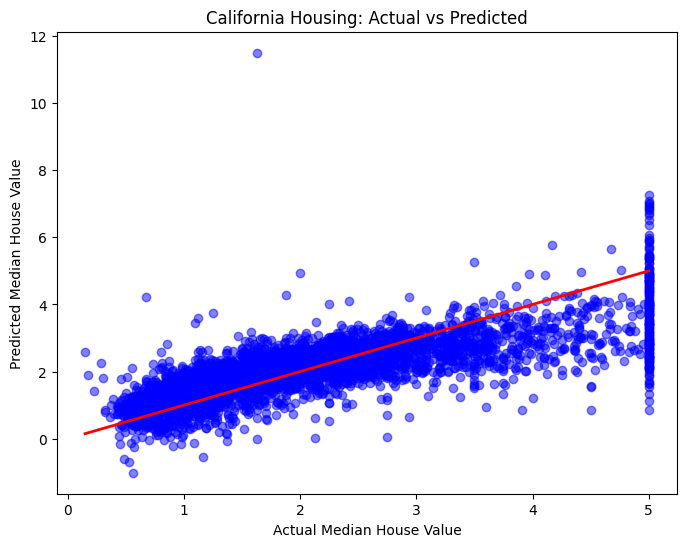

In [18]:
# PLOTTING :-
''' 
- in 1D i.e. simple Linear regression plotting we used to compare between Actual price(in scattering Dots) and predicted price(in plot Line) 
- So, there we kept House-size / feature in X-axis and House-price in y-axis
- But here in case of multi-Linear Aggression, there r multiple features.
- so, all features can't be kept in single X-axis, matplotlib will throw error
- So, in this case we'll compare actual-price v/s predicted-price, not feature v/s price 
'''
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predict, alpha=0.5, color='blue')
# 👆 here it will create scattering dots using y_test from X-axis & y_predict from y-axis
# here each scattering dots r those 20% single houses which r kept for testing purpose, which have a real-price(i.e. y_test) & a predicted price(i.e. y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
# 👆 here it will plot a linear line which starts from y_test.min() to y_test.max() for X-axis & starts from y_test.min() to y_test.max() for y-axis
# i.e here the line represents "actual price = predicted price"
# i.e a perfect 45 degree angle line where on line each point's value is same on both x & y axis 
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("California Housing: Actual vs Predicted")
plt.show()

# So, overall the dot which lies on the line have both actual nd predicted price same !

- 👆 here Every blue dot = a house: (actual price in X v/s predicted price in y)
- Red line = perfect 45° line where predicted = actual
- any Red Dot on line → perfect prediction
- Dot above/below line → over/under prediction
- Distance from line = error magnitude

## Important :

    - We can see on plot that, till actual price 3 it was underpredicting half houses overpredting rest half prices nd many on line b

    - But when actual price increases after 3 to till 5 model is very very much underpredcting prices, that's why after 3.5 mostly all dots r below line

    - it's bcuz, it's an Non-linear relationship, not like house-size v/s house-price which is linear nd can 100% correctly predicted by Linear regression model.

    - But these models can’t handle non-linear relationships (like here price vs many house features) or extreme values well.

    - So for non-linear there r Advanced algorithms → Decision Trees, Random Forest, Gradient Boosting

## Reducing Errors in Linear Regression :

    - After creating a model, if errors are high or patterns in residuals appear (like high-priced houses underpredicted), we tweak or improve features to reduce errors.

    - Adding polynomial features is one of those tweaks → it’s literally a way to reduce errors in linear regression when the relationship isn’t perfectly linear.

    
## Think of it like this:

    Linear regression = straight ruler → good for simple relationships.

    Polynomial features = flexible ruler → can bend to fit curves → reduces under/over-predictions.

- So, in the above plot we saw Actual Value onwards 3/3.5, every predictions r undervalued, so we can curve 

RMSE: 0.681, R²: 0.646


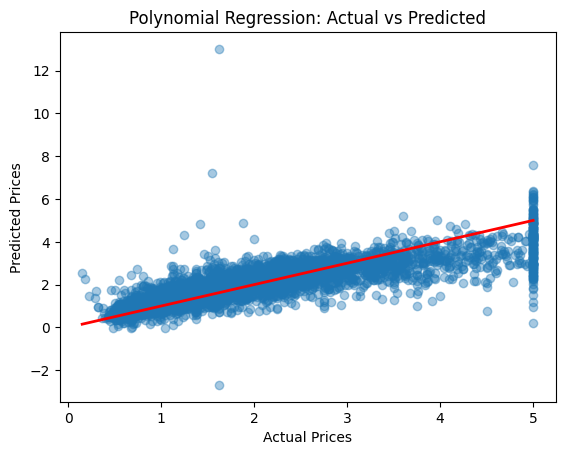

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.3f}, R²: {r2:.3f}")

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()

- still it's under predicting 😅
- cuz, Polynomial features help a bit, but California Housing is really non-linear and messy.
- That’s why ML pros switch to tree-based models (Decision Trees, Random Forest, Gradient Boosting) for datasets like this.